# Eksplorasi UFC bagian C

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
pd.set_option('display.max_colwidth', None)

# Read data
df = pd.read_csv('UFC_train.csv')

df.head()

,R_fighter,B_fighter,Referee,date,location,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner
0,Joe Riggs,Joe Doerksen,Steve Mazzagatti,2004-08-21,"Las Vegas, Nevada, USA",False,Middleweight,NaN,NaN,NaN,...,0,0,0,Southpaw,182.88,177.80,185.0,26.0,21.0,Red
1,Jorge Masvidal,Al Iaquinta,Keith Peterson,2015-04-04,"Fairfax, Virginia, USA",False,Lightweight,1.156250,0.000000,0.394141,...,0,1,0,Orthodox,180.34,187.96,170.0,27.0,30.0,Blue
2,Dan Stittgen,Stephen Thompson,Josh Rosenthal,2012-02-04,"Las Vegas, Nevada, USA",False,Welterweight,NaN,NaN,NaN,...,0,0,0,Orthodox,185.42,NaN,170.0,28.0,31.0,Blue
3,Josh Koscheck,Johny Hendricks,Kevin Mulhall,2012-05-05,"East Rutherford, New Jersey, USA",False,Welterweight,0.695312,0.000000,0.783359,...,6,3,0,Orthodox,177.80,185.42,170.0,28.0,34.0,Blue
4,John Dodson,Manvel Gamburyan,James Warring,2016-04-16,"Tampa, Florida, USA",False,Bantamweight,0.500000,0.266602,0.381462,...,3,0,1,Orthodox,160.02,167.64,135.0,34.0,31.0,Red


In [13]:
# Get df columns info
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 144 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    R_fighter                     5410 non-null   object 
 1    B_fighter                     5410 non-null   object 
 2    Referee                       5379 non-null   object 
 3    date                          5410 non-null   object 
 4    location                      5410 non-null   object 
 5    title_bout                    5410 non-null   bool   
 6    weight_class                  5410 non-null   object 
 7    B_avg_KD                      4117 non-null   float64
 8    B_avg_opp_KD                  4117 non-null   float64
 9    B_avg_SIG_STR_pct             4117 non-null   float64
 10   B_avg_opp_SIG_STR_pct         4117 non-null   float64
 11   B_avg_TD_pct                  4117 non-null   float64
 12   B_avg_opp_TD_pct              4117 non-null   

/var/folders/53/kv053qr13vxg2_y_1lg6hjg80000gn/T/ipykernel_8624/1049119815.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


Dari informasi yang didapatkan di atas, fitur-fitur yang kemungkinan memiliki relasi dengan fitur panjang jangkauan lengan petinju adalah fitur-fitur yang mendeskripsikan fisik dari petinju. Fitur-fitur ini adalah :  
- B_Height_cms
- B_Weight_lbs
- B_age

Adapun juga fitur lain yang tidak mendeskripsikan fisik, tetapi dapat memengaruhi panjang jangkauan lengan petinju seperti : 
- B_Stance
- weight_class


In [14]:
reach_df = df[["B_fighter", "B_Height_cms", "B_Weight_lbs", "B_age", "B_Stance", "weight_class", "B_Reach_cms"]]

reach_df.head()

,B_fighter,B_Height_cms,B_Weight_lbs,B_age,B_Stance,weight_class,B_Reach_cms
0,Joe Doerksen,182.88,185.0,26.0,Orthodox,Middleweight,190.50
1,Al Iaquinta,177.80,155.0,27.0,Orthodox,Lightweight,177.80
2,Stephen Thompson,182.88,170.0,28.0,Orthodox,Welterweight,190.50
3,Johny Hendricks,175.26,185.0,28.0,Southpaw,Welterweight,175.26
4,Manvel Gamburyan,165.10,135.0,34.0,Orthodox,Bantamweight,170.18


In [15]:
# Drop rows with OpenWeight weight_class
# reach_df = reach_df[reach_df["weight_class"] != "OpenWeight"]

In [16]:
# Drop B_Reach_cms null values
print(reach_df.isnull().sum())
reach_df = reach_df[reach_df['B_Reach_cms'].notna()]
print(reach_df.isnull().sum())


B_fighter         0
B_Height_cms     10
B_Weight_lbs      8
B_age           161
B_Stance         64
weight_class      0
B_Reach_cms     810
dtype: int64
B_fighter       0
B_Height_cms    2
B_Weight_lbs    0
B_age           8
B_Stance        7
weight_class    0
B_Reach_cms     0
dtype: int64


In [17]:
df

,R_fighter,B_fighter,Referee,date,location,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner
0,Joe Riggs,Joe Doerksen,Steve Mazzagatti,2004-08-21,"Las Vegas, Nevada, USA",False,Middleweight,NaN,NaN,NaN,...,0,0,0,Southpaw,182.88,177.80,185.0,26.0,21.0,Red
1,Jorge Masvidal,Al Iaquinta,Keith Peterson,2015-04-04,"Fairfax, Virginia, USA",False,Lightweight,1.156250,0.000000,0.394141,...,0,1,0,Orthodox,180.34,187.96,170.0,27.0,30.0,Blue
2,Dan Stittgen,Stephen Thompson,Josh Rosenthal,2012-02-04,"Las Vegas, Nevada, USA",False,Welterweight,NaN,NaN,NaN,...,0,0,0,Orthodox,185.42,NaN,170.0,28.0,31.0,Blue
3,Josh Koscheck,Johny Hendricks,Kevin Mulhall,2012-05-05,"East Rutherford, New Jersey, USA",False,Welterweight,0.695312,0.000000,0.783359,...,6,3,0,Orthodox,177.80,185.42,170.0,28.0,34.0,Blue
4,John Dodson,Manvel Gamburyan,James Warring,2016-04-16,"Tampa, Florida, USA",False,Bantamweight,0.500000,0.266602,0.381462,...,3,0,1,Orthodox,160.02,167.64,135.0,34.0,31.0,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,Matt Frevola,Luis Pena,Herb Dean,2019-10-12,"Tampa, Florida, USA",False,Lightweight,0.125000,0.000000,0.481250,...,0,0,0,Orthodox,175.26,180.34,155.0,26.0,29.0,Red
5406,Demian Maia,Rick Story,Mario Yamasaki,2012-10-13,"Rio de Janeiro, Brazil",False,Welterweight,0.015625,0.000000,0.384980,...,1,5,0,Southpaw,185.42,182.88,170.0,28.0,34.0,Red
5407,Eduardo Garagorri,Humberto Bandenay,Osiris Maia,2019-08-10,"Montevideo, Uruguay",False,Featherweight,0.250000,0.250000,0.602500,...,0,0,0,Orthodox,175.26,177.80,145.0,24.0,30.0,Red
5408,Danny Castillo,Edson Barboza,Mike Beltran,2013-12-14,"Sacramento, California, USA",False,Lightweight,0.875000,0.125000,0.543125,...,1,0,0,Orthodox,175.26,180.34,155.0,27.0,34.0,Blue


<AxesSubplot:>

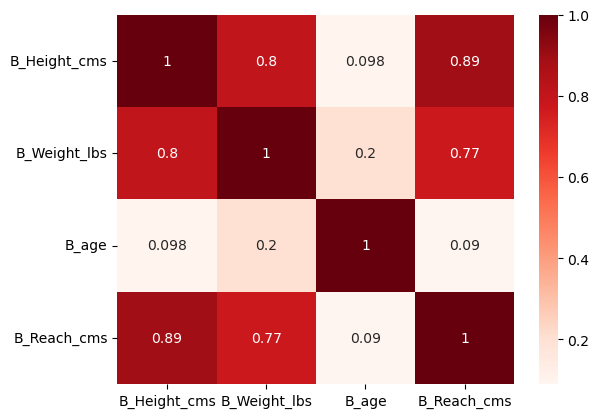

In [18]:
# Get correlation matrix of reach_df for continuous variables
corr = reach_df.corr()

# Plot correlation matrix
sns.heatmap(corr, annot=True, cmap='Reds')

Dari correlation heatmap di atas, dapat di-infer bahwa fitur B_Height_cms dan B_Weight_lbs memiliki hubungan positive correlation dengan B_Reach_cms

<AxesSubplot:xlabel='B_Stance', ylabel='B_Reach_cms'>

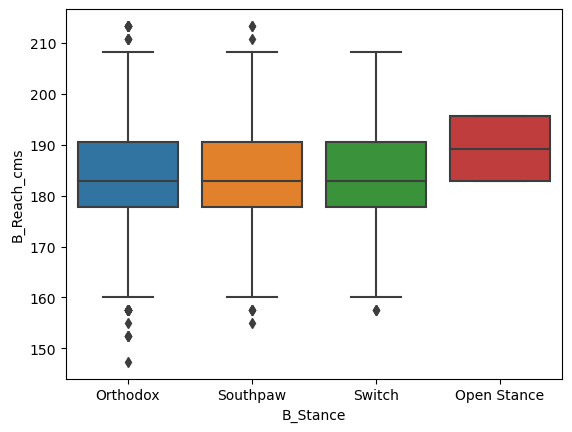

In [19]:
# Boxplot of B_Reach_cms relative to B_Stance
sns.boxplot(x="B_Stance", y="B_Reach_cms", data=reach_df)

<AxesSubplot:xlabel='weight_class', ylabel='B_Reach_cms'>

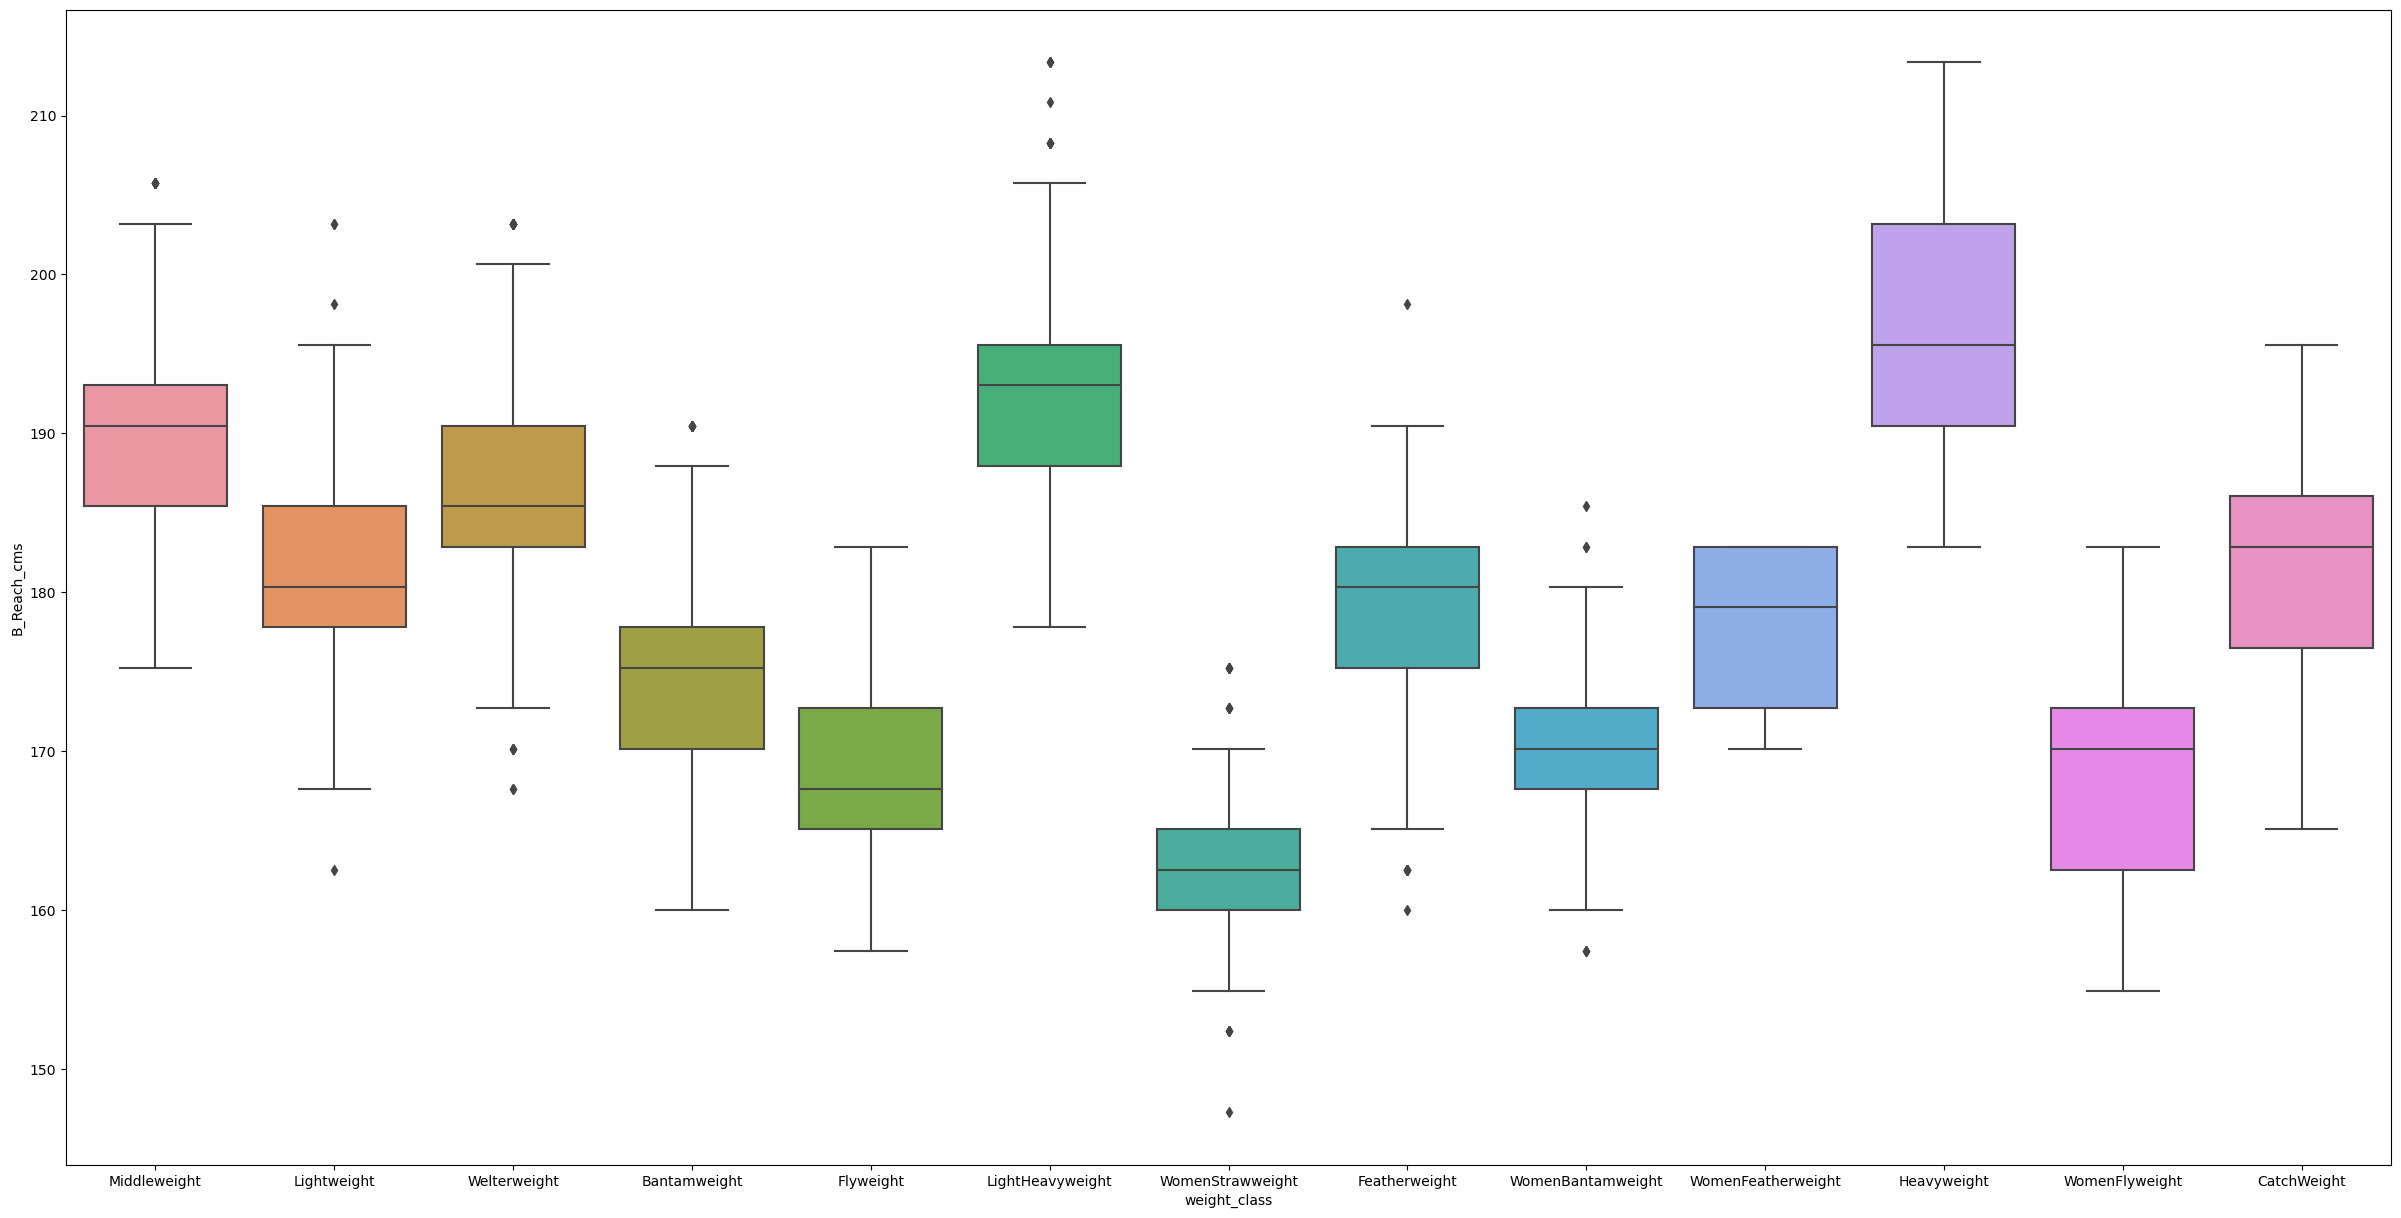

In [20]:
# Boxplot of B_Reach_cms relative to weight_class and enlarge the plot
plt.figure(figsize=(30, 15))
sns.boxplot(x="weight_class", y="B_Reach_cms", data=reach_df)